In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lab 3. Stratifies analysis

---

In this session we begin by using raw data to assess the effect of a **single risk factor** (e.g. sex) on a particular outcome and quantify the effect by computing odds ratios and relative risks. 

We shall then look at assessing an **ordered** exposure variable (passenger class) and isolate the (linear) **trend component**. 

Finally we shall perform a **stratified analysis** to obtain an adjusted Odds Ratio and test of homogeneity.



## Data upload

We are going to work with the Titanic survival data. Upload the data file “Titanic data.sav” (or .csv) as showed in the last week lab sheet.

The aim of this exercise is to identify factors associated with survival.

Here is the meaning of the six variables in the data set:

1 – name = passenger name as “string” variable 

2 – pclass = passenger class, as string variable with values 1st, 2nd or 3rd {a string variable}

3 – age =  age of passenger in years,

4 – sex = gender, as string variable with values male or female.

5 – alive, coded 1 = yes and 2 = no

6 – survival status, coded 1 = survived and 0 = died

7 – class = passenger class recoded as a numeric variable coded 1, 2, 3

Now visualise the first six rows of the data file:

In [2]:
dataset = read.csv("Titanic_data.csv")
head(dataset)

,X,name,pclass,age,sex,alive,survived,class
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>
1,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
2,2,"Allison, Miss Helen Loraine",1st,2.00,female,2,0,1
3,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,2,0,1
4,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,2,0,1
5,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,1,1
6,6,"Anderson, Mr Harry",1st,47.00,male,1,1,1


## Single risk factor (Question 1)

> *Our first research question is: “Does Survival depend upon passenger sex, and if so how?”*

To answer the first question, we generate a table having “sex” in the rows and “alive” in the columns. (See how to use the “table” command from last week’s tutorial).

The output will give you the crude table without any additional information. (Check the table below to see if the data you have are correct)

|	     |   alive            |   | |
|----------|-----|-----|----------|
| **sex**  | Yes |  No | **Total**|
|female    | 308 | 154 |    462   |
|	 male    | 142 | 709 |    851   |
| **Total**| 450 | 863 |   1313   |


If we want to know more and automatically run the Chi-square test we can use the command CrossTable in the ”gmodels” package:

In [3]:
install.packages("gmodels")
library(gmodels)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


In CrossTable we need to declare “sex” to be the **row variable** and “alive” as the **column variable**.

In [4]:
CrossTable(dataset$sex, dataset$alive, expected = TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1313 

 
             | dataset$alive 
 dataset$sex |         1 |         2 | Row Total | 
-------------|-----------|-----------|-----------|
      female |       308 |       154 |       462 | 
             |   158.340 |   303.660 |           | 
             |   141.457 |    73.761 |           | 
             |     0.667 |     0.333 |     0.352 | 
             |     0.684 |     0.178 |           | 
             |     0.235 |     0.117 |           | 
-------------|-----------|-----------|-----------|
        male |       142 |       709 |       851 | 
             |   291.660 |   559.340 |           | 
             |    76.796 |    40.044 |           | 
             |     0.167 |     0.833 |     0.648 | 
          

In your table you should get among other things the count of observations for each category as in TblRaw.

To learn more about CrossTable go to:

https://www.rdocumentation.org/packages/gmodels/versions/2.18.1/topics/CrossTable

or just type

In [5]:
help(CrossTable)

CrossTable               package:gmodels               R Documentation

_C_r_o_s_s _T_a_b_u_l_a_t_i_o_n _w_i_t_h _T_e_s_t_s _f_o_r _F_a_c_t_o_r _I_n_d_e_p_e_n_d_e_n_c_e

_D_e_s_c_r_i_p_t_i_o_n:

     An implementation of a cross-tabulation function with output
     similar to S-Plus crosstabs() and SAS Proc Freq (or SPSS format)
     with Chi-square, Fisher and McNemar tests of the independence of
     all table factors.

_U_s_a_g_e:

     CrossTable(x, y, digits=3, max.width = 5, expected=FALSE, prop.r=TRUE, prop.c=TRUE,
                prop.t=TRUE, prop.chisq=TRUE, chisq = FALSE, fisher=FALSE, mcnemar=FALSE,
                resid=FALSE, sresid=FALSE, asresid=FALSE,
                missing.include=FALSE,
                format=c("SAS","SPSS"), dnn = NULL, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: A vector or a matrix. If y is specified, x must be a vector

       y: A vector in a matrix or a dataframe

  digits: Num

The cross tabulation shows that 308 of the 462 females survived compared to only 142 of the 851 males.

**Note:** *The FIRST ROW (female sex) is the EXPOSURE variable. The FIRST COLUMN (alive = survival) is the OUTCOME of interest.*

The “usual” Chi-square test statistic, 332.057, returns a significant result indicating that sex predicts survival.
If we now want to learn more about the relative risk, that is to measure the significance, we need to use the package “epiR” and the command “epi.2by2”

In [6]:
install.packages("epitools")
library(epitools)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


In [7]:
TblRaw = table(dataset$sex,dataset$alive)
TblRaw

        
           1   2
  female 308 154
  male   142 709

In [8]:
oddsratio(TblRaw,method="wald",conf.level=0.95,rev="b")

,2,1,Total
male,709,142,851
female,154,308,462
Total,863,450,1313
,estimate,lower,upper
male,1.000000,NA,NA
female,9.985915,7.66614,13.00766
,midp.exact,fisher.exact,chi.square
male,NA,NA,NA
female,0,4.826448e-74,3.425855e-74


The Odds of survival for females (= exposed group) relative to males (= comparator group), the OR = 9.99, indicating that females were approximately 10 times more likely (in terms of odds) to survive than males!

The Relative Risk (Inc risk ratio) of female survival compared to males, RR = 4.

*Note that Odds Ratios can appear more striking than Relative Risks.*

Try to introduce the following options in oddsratio: 

```
correction = FALSE
verbose = TRUE
```


In [9]:
oddsratio(TblRaw,method="wald",correction=FALSE,verbose=TRUE,conf.level=0.95,rev="b")

$x
        
           2   1
  male   709 142
  female 154 308

$data
        
           2   1 Total
  male   709 142   851
  female 154 308   462
  Total  863 450  1313

$p.exposed
        
                 2         1    Total
  male   0.8215527 0.3155556 0.648134
  female 0.1784473 0.6844444 0.351866
  Total  1.0000000 1.0000000 1.000000

$p.outcome
        
                 2         1 Total
  male   0.8331375 0.1668625     1
  female 0.3333333 0.6666667     1
  Total  0.6572734 0.3427266     1

$measure
        odds ratio with 95% C.I.
         estimate   lower    upper
  male   1.000000      NA       NA
  female 9.985915 7.66614 13.00766

$conf.level
[1] 0.95

$p.value
        two-sided
         midp.exact fisher.exact   chi.square
  male           NA           NA           NA
  female          0 4.826448e-74 3.425855e-74

$correction
[1] FALSE

attr(,"method")
[1] "Unconditional MLE & normal approximation (Wald) CI"

## Multicategories and Test for Trend (Question 2)
> *Does passenger class predict survival?*



Repeat the process above to produce a Cross tabulation with “pclass” as the row variable and “Alive” as the column variable. You should get the following:

|	     |   alive            |   | |
|----------|-----|-----|----------|
|**pclass**| Yes |  No | **Total**|
| 1st      | 193 |	129|	322     |
|	2nd      | 119 | 161 |	280     |
|	3rd	     | 138 | 573 |  711     |
| **Total**| 450 | 863 |  1313    |

In [10]:
CrossTable(dataset$pclass, dataset$alive, expected = TRUE)


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1313 

 
               | dataset$alive 
dataset$pclass |         1 |         2 | Row Total | 
---------------|-----------|-----------|-----------|
           1st |       193 |       129 |       322 | 
               |   110.358 |   211.642 |           | 
               |    61.887 |    32.270 |           | 
               |     0.599 |     0.401 |     0.245 | 
               |     0.429 |     0.149 |           | 
               |     0.147 |     0.098 |           | 
---------------|-----------|-----------|-----------|
           2nd |       119 |       161 |       280 | 
               |    95.963 |   184.037 |           | 
               |     5.530 |     2.884 |           | 
               |     0.425 |     0.5

The “Test Statistic” 172.3 indicates a strong association between passenger class and survival.

Note that Odds Ratios are not produced when there are more than two “exposure” categories.

Use the data above to compute the Odds of survival for 1st, 2nd & 3rd class passengers:

**Odds of survival by passenger's class** 
                         
*   1st 
*   2nd
*   3rd

**What do you notice?**

In [11]:
193/129
119/161
138/573

[1] 1.496124

[1] 0.7391304

[1] 0.2408377

*Note that the last variable “class” is a **numerical** version of “pclass” which was a **string** variable.*

Repeat the process above to produce a table (TblRaw2) with **“class”** as the **row variable** (rather than pclass) and “Alive” as the column variable.  Also in this case you will not be able to run “`epi.2by2`” but you’ll need to load a new library in order to run the Chi-square trend test. The library is `“DescTools”` and the command to use is “`prop.trend.test`(vector with observed success , vector with totals , vector with ranking)”

In [12]:
install.packages("DescTools")
library(DescTools)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


Registered S3 method overwritten by 'DescTools':
  method         from 
  reorder.factor gdata



In [13]:
Tblclass = table(dataset$class,dataset$alive)
Tblclass

   
      1   2
  1 193 129
  2 119 161
  3 138 573

In [14]:
x<-Tblclass[,1]
x

1   2   3 
193 119 138

In [15]:
n<-rowSums(Tblclass)
n

1   2   3 
322 280 711

In [16]:
prop.trend.test(x, n, c(1,2,3))


	Chi-squared Test for Trend in Proportions

data:  x out of n ,
 using scores: 1 2 3
X-squared = 171.54, df = 1, p-value < 2.2e-16


  The chi-square test for **LINEAR TREND** = 171.54 is **highly significant**. 

>  The deviation from a linear trend = 172.3 – 171.54 = 0.76, is negligible

In the plot we can see the proportion of alive passengers vs class.

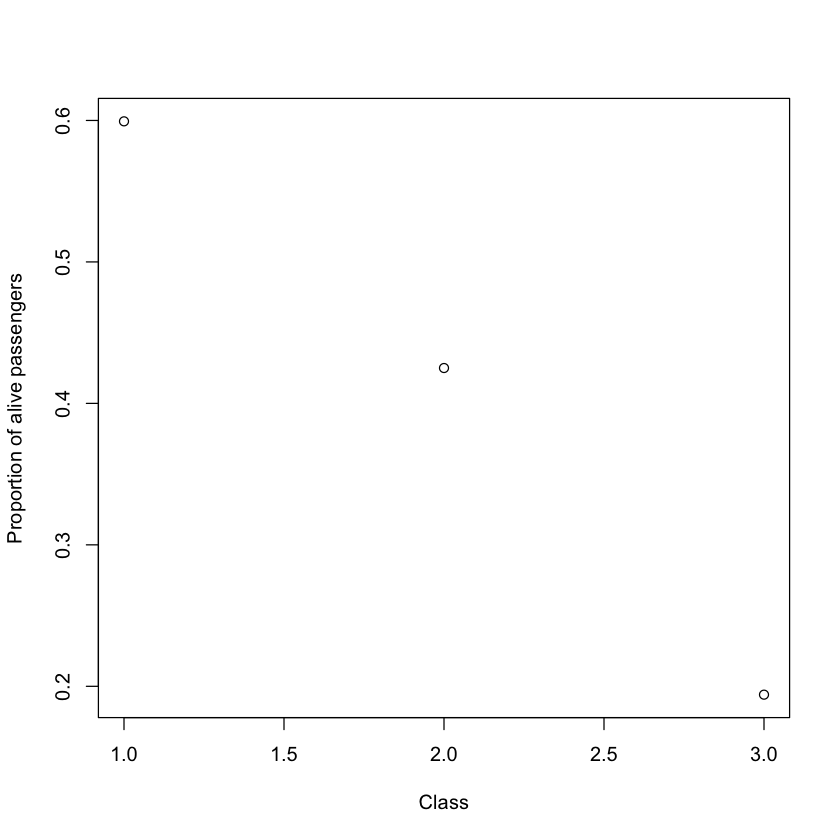

In [17]:
plot(c(1,2,3),x/n,xlab = "Class", ylab = "Proportion of alive passengers")

## Stratified Analysis (Question 3)
We saw earlier that the “odds” for female survival was about 10 times higher than men. So we might ask

> *Is the effect of female sex depend upon passenger class?*

To answer this question, we can stratify passengers by their class.

There are different ways to do so. One way is to aggregate the data we want to focus on like follows:

In [18]:
MyData=aggregate(survived ~  pclass+ alive + sex, data=dataset, FUN=length)
View(MyData)

pclass,alive,sex,survived
<chr>,<int>,<chr>,<int>
1st,1,female,134
2nd,1,female,94
3rd,1,female,80
1st,2,female,9
2nd,2,female,13
3rd,2,female,132
1st,1,male,59
2nd,1,male,25
3rd,1,male,58


and to create a table out of them:

In [19]:
Mytable = xtabs(survived ~ sex + alive + pclass, data=MyData)
ftable(Mytable)

             pclass 1st 2nd 3rd
sex    alive                   
female 1            134  94  80
       2              9  13 132
male   1             59  25  58
       2            120 148 441

“Sex” is the exposure or ROW variable. The outcome “alive” remains as the COLUMN variable. “pclass” is assumed to be the “LAYER” variable.

We can ask to get the sums for each row and column by typing

In [20]:
#help(addmargins)

In [21]:
addmargins(Mytable, margin = seq_along(dim(Mytable)), FUN = sum, quiet = FALSE)

Margins computed over dimensions
in the following order:
1: sex
2: alive
3: pclass


, , pclass = 1st

        alive
sex         1    2  sum
  female  134    9  143
  male     59  120  179
  sum     193  129  322

, , pclass = 2nd

        alive
sex         1    2  sum
  female   94   13  107
  male     25  148  173
  sum     119  161  280

, , pclass = 3rd

        alive
sex         1    2  sum
  female   80  132  212
  male     58  441  499
  sum     138  573  711

, , pclass = sum

        alive
sex         1    2  sum
  female  308  154  462
  male    142  709  851
  sum     450  863 1313


The first thing we want to understand is if there is a significant sex effect in each stratum. To do so we need to run tests of association for each table. Since we don’t want to redefine our table for each pclass we will need to use the function apply in the package samplesizeCMH

In [22]:
apply(Mytable, 3, chisq.test,correct = FALSE)

$`1st`

	Pearson's Chi-squared test

data:  array(newX[, i], d.call, dn.call)
X-squared = 122.16, df = 1, p-value < 2.2e-16


$`2nd`

	Pearson's Chi-squared test

data:  array(newX[, i], d.call, dn.call)
X-squared = 145.75, df = 1, p-value < 2.2e-16


$`3rd`

	Pearson's Chi-squared test

data:  array(newX[, i], d.call, dn.call)
X-squared = 64.859, df = 1, p-value = 8.044e-16



To calculate female ORs for each class we can use apply again:

In [23]:
install.packages("samplesizeCMH")
library(samplesizeCMH)
apply(Mytable, 3, odds.ratio)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


1st      2nd      3rd 
30.28249 42.80615  4.60815

However, this information is incomplete. If we want to know more we can run

In [24]:
apply(Mytable, 3, oddsratio.wald, rev='b')

,2,1,Total
male,120,59,179
female,9,134,143
Total,129,193,322
,estimate,lower,upper
male,1.00000,NA,NA
female,30.28249,14.3994,63.68521
,midp.exact,fisher.exact,chi.square
male,NA,NA,NA
female,0,1.086515e-31,2.130831e-28
,2,1,Total


In the table below, you can find a summary of the Odds Ratios for each stratum:

|pclass | Risk Estimate| Value	| 95% CI |
|-------|--------------|--------|---------------------|
|1st |	OR for sex (f/m)|	30.282 |	(14.399,	63.685) |
|2nd	| OR for sex (f/m)|	42.806 |	(20.871,	87.794) |
|3rd	| OR for sex (f/m)|	4.608  |	(3.120,	6.806)    |
|Total|	OR for sex (f/m)|	9.986  |	(7.667,	13.008)   |

Note that the Odds Ratio for female sex differ considerably across strata. First class females are 30 times more likely (in terms of odds)  to survive compared to males. For third class females the OR falls to below 5.0.

### Cochran's or Mantel-Haenszel test



> From [Cran](https://cran.r-project.org/web/packages/samplesizeCMH/vignettes/samplesizeCMH-introduction.html):  The Cochran-Mantel-Haenszel test (CMH) is an inferential test for the association between two binary variables, while controlling for a third confounding nominal variable (Cochran 1954; Mantel and Haenszel 1959). Essentially, the CMH test examines the weighted association of a set of 2 × 2 tables. A common odds ratio relating to the test statistic can also be generated (Mantel and Haenszel 1959). The CMH test is a common technique in the field of biostatistics, where it is often used for case-control studies.



We can run two significant Chi-square statistics, Cochran’s and Mantel-Haenszel to understand if the pooled OR, measuring the being female over survival among the different passenger classes, differs significantly from one. The tests (of conditional independence) indicate that the answer is yes.

In [25]:
mantelhaen.test(Mytable)


	Mantel-Haenszel chi-squared test with continuity correction

data:  Mytable
Mantel-Haenszel X-squared = 311.41, df = 1, p-value < 2.2e-16
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
  8.22473 14.68987
sample estimates:
common odds ratio 
         10.99182 


In [26]:
dataset$fpclass <- as.factor(dataset$pclass)
dataset$falive  <- as.factor(dataset$alive)
dataset$fsex    <- as.factor(dataset$sex)

In [27]:
install.packages("coin")
library(coin)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:epitools’:

    ratetable




Let's have a look at the data file.

In [28]:
head(dataset)

,X,name,pclass,age,sex,alive,survived,class,fpclass,falive,fsex
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1,1st,1,female
2,2,"Allison, Miss Helen Loraine",1st,2.00,female,2,0,1,1st,2,female
3,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,2,0,1,1st,2,male
4,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,2,0,1,1st,2,female
5,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,1,1,1st,1,male
6,6,"Anderson, Mr Harry",1st,47.00,male,1,1,1,1st,1,male


In [29]:
cmh_test(falive ~ fsex | fpclass, data = dataset)


	Asymptotic Generalized Cochran-Mantel-Haenszel Test

data:  falive by
	 fsex (female, male) 
	 stratified by fpclass
chi-squared = 313.72, df = 1, p-value < 2.2e-16


In [30]:
#help(cmh_test)

The test of conditional independence is examining if the pooled or “adjusted” Odds Ratio for female gender, adjusting for passenger class differs significantly from 1.0.

**If the test of heterogeneity is not significant then a pooled or adjusted Odds Ratio can be used to summarise the effect of female sex on survival.**

The Odds Ratio for female sex **adjusting for class** given in output by `mantelhaen.test` is 10.99, and gives 95% confidence limits 8.22 to 14.69.

Finally, we can run the test of homogeneity (Woolf)

In [31]:
install.packages("vcd")


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpbWDqh7/downloaded_packages


In [32]:
library(vcd)
woolf_test(Mytable)

Loading required package: grid


Attaching package: ‘vcd’


The following object is masked from ‘package:epitools’:

    oddsratio





	Woolf-test on Homogeneity of Odds Ratios (no 3-Way assoc.)

data:  Mytable
X-squared = 39.412, df = 2, p-value = 2.766e-09


If the result of the Woolf test for homogeneity of odds ratios across strata is significant, then the M-H test is not appropriate.

In this case **the Woolf test is significant**. Therefore, we would report separate Odds Ratios for first-, second- and third-class female passengers.

## Stratified analyses – from sample frequency tables

In this section we will look at how data from frequency tables can be input into R and analysed, as opposed to using the raw data.

We shall begin by working through the following example from your notes:

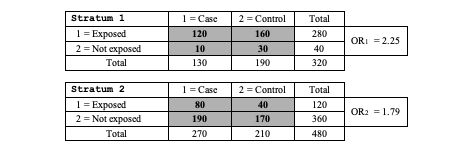

Let's create a dataset with the data above:

In [33]:
Input = ("
stratum       Exposure     Outcome  Count
        1        Yes      Case        120
        1        Yes      Control     160
        1         No      Case         10
        1         No      Control      30
        2        Yes      Case         80
        2        Yes      Control      40
        2         No      Case        190
        2         No      Control     170
	")

Data = read.table(textConnection(Input),header=TRUE)
Data

stratum,Exposure,Outcome,Count
<int>,<chr>,<chr>,<int>
1,Yes,Case,120
1,Yes,Control,160
1,No,Case,10
1,No,Control,30
2,Yes,Case,80
2,Yes,Control,40
2,No,Case,190
2,No,Control,170


In [34]:
### Order factors otherwise R will alphabetize them.  Outcome is in alphabetical order
Data$Exposure = factor(Data$Exposure,levels=unique(Data$Exposure))
Data

stratum,Exposure,Outcome,Count
<int>,<fct>,<chr>,<int>
1,Yes,Case,120
1,Yes,Control,160
1,No,Case,10
1,No,Control,30
2,Yes,Case,80
2,Yes,Control,40
2,No,Case,190
2,No,Control,170


In [35]:
levels(Data$Exposure)

[1] "Yes" "No"

In [36]:
#Convert data to a table
Table = xtabs(Count ~ Exposure + Outcome + stratum, data=Data)
Table

, , stratum = 1

        Outcome
Exposure Case Control
     Yes  120     160
     No    10      30

, , stratum = 2

        Outcome
Exposure Case Control
     Yes   80      40
     No   190     170


###**Example/Exercise:** 
Run on these data the same kind of statistics we have run in the previous example.

ERROR: Error in oddsratio(Table, method = "wald", conf.level = 0.95, rev = "b"): unused arguments (method = "wald", conf.level = 0.95, rev = "b")


Here there is a summary of the results, showing the margins:

|Stratum | Exposure	| Outcome=1 |	Outcome=2 | Total |
|--------|----------|-----------|-----------|-------|
|1.00		 |  1       |  120     |    160	    |  280  |
|		| 2 |10	|30	|40|
|	Total  |          |	130       |	190       |	320   |
|-----------|||||
|2.00 | 1 |	80	| 40 |	120|
|		  | 2	| 190 |	170|	360|
|	Total| |	270 |	210|	480|
|-----------|||||
|Sum   | 1	|	200 |	200|	400|
|		   | 2 |	200 |	200|	400|
|	Total|	 | 400	| 400|	800|


Tests of association for each stratum and overall (crude)

In [43]:
apply(Table, 3 , chisq.test,correct = FALSE)

$`1`

	Pearson's Chi-squared test

data:  array(newX[, i], d.call, dn.call)
X-squared = 4.627, df = 1, p-value = 0.03147


$`2`

	Pearson's Chi-squared test

data:  array(newX[, i], d.call, dn.call)
X-squared = 7.0547, df = 1, p-value = 0.007906



In [44]:
chisq.test(xtabs(Count ~ Exposure + Outcome, data= Data))


	Pearson's Chi-squared test

data:  xtabs(Count ~ Exposure + Outcome, data = Data)
X-squared = 0, df = 1, p-value = 1


The association within each stratum is significant (p = 0.031 & 0.008  < 0.05) but not when data are collapsed into a single table (Total p = 1.000).

Measures of impact (ORs & RRs) are presented for each stratum and overall (crude):

In [49]:
help(oddsratio)
# oddsratio(Table,method="wald",correction=FALSE,verbose=TRUE,conf.level=0.95,rev="b") 

oddsratio               package:epitools               R Documentation

_O_d_d_s _r_a_t_i_o _e_s_t_i_m_a_t_i_o_n _a_n_d _c_o_n_f_i_d_e_n_c_e _i_n_t_e_r_v_a_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     Calculates odds ratio by median-unbiased estimation (mid-p),
     conditional maximum likelihood estimation (Fisher), unconditional
     maximum likelihood estimation (Wald), and small sample adjustment
     (small). Confidence intervals are calculated using exact methods
     (mid-p and Fisher), normal approximation (Wald), and normal
     approximation with small sample adjustment (small).

_U_s_a_g_e:

     oddsratio(x, y = NULL,
               method = c("midp", "fisher", "wald", "small"),
               conf.level = 0.95,
               rev = c("neither", "rows", "columns", "both"),
               correction = FALSE,
               verbose = FALSE)
     oddsratio.midp(x, y = NULL,
                    conf.level = 0.95,
                  

Let's now perform a test of Homogeneity with the “Woolf” test. What does it tell us?

In this case the Woolf test is not significant. Therefore we can run a CMH test and calculate the pooled OR.

The test proves that the stratified (or adjusted) OR differs significantly from 1.0 ($H_0: \text{OR}_\text{pooled} = 1.0$). 

The p-value, 0.001, indicates strong evidence that exposure has an effect on outcome after adjusting for gender.  The adjusted OR is 1.90 with 95% limits 1.31 to 2.76.

## Exercises

### Exercise 1

A twenty year study was conducted between 1974 and 1994 in which 1314 women were classified as smokers or non smokers and death rates compared. The data are tabulated below:

|Status|Died|Survived|Total|
|--|--|--|--|
|Smoker|139|443|582|
|Non-smoker|230|502|732|
|Total|369|945|1314|

Use R to carry out a test of association. Estimate the odds of death among smokers relative to non-smokers, giving a 95% confidence interval. How might you interpret your results? 

OR=                                              
95% CI =

Interpretation:





The women were divided into three strata according to age.

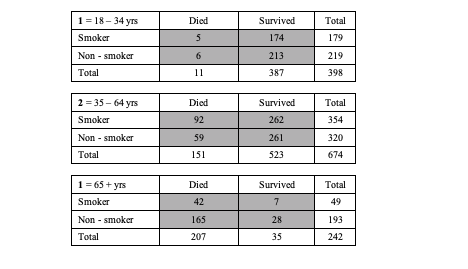

Use R to run a stratified analysis on these data. Compute the Odds ratio for each stratum (age group) and comment on the results compared to the crude OR obtained above.


OR1 =                            
OR2 =                                 
OR3 = 


What does the test of homogeneity indicate?           

CS =                  
p =         

Obtain the OR for smoking adjusting for age, with approximate 95% CI.     

OR =              
CI =  

What do you conclude?   

### Exercise 2

Open the file “SPSS Practical Dataset 1” containing the following variables:

1.	Subject ID

2.	Ethnicity, coded ethnic group 1 = White, 2 = Black or 3 = Other

3.	Gender, coded 1 = Male, 2 = Female

4.	Outcome, coded 1 = Diseased, 2 = Healthy

5.	Diseased, coded 1 = Yes, 2 = No.

Q1. Use the xtabs command to run a Chi-square test to determine if gender predicts health outcome in this study.

What is the Odds Ratio for Male gender? Interpret the Odds Ratio.

OR =                            
CI =   

Q2. Run a stratified analysis using ethnicity as the strata or “layer” variable.

What are the Odds Ratios for male gender in each subgroup?

1. Ehnic group 1     
OR1 =                            
CI =       

2. Ehnic group 2     
OR2 =                           
CI = 

3. Ehnic group 3     
OR3 =                           
CI = 


Q3. What is the value of the test statistic for homogeneity?         

CS =                                                 
p = 

 What do these results suggest?

Q4. Obtain the OR for gender adjusting for ethnicity, giving an approximate 95% CI.     

OR =                                         
CI =  

What do you conclude?  